NOTE: CoLab usually autosaves your work, but just to be safe, make sure to save it manually too!


***Double click*** and enter your name here!

Name: Qianwen Luo

# Lab 4: Predator-Prey
This is your first lab creating a non-grid based model. Cool!

Problems 1 and 2 are basic coding exercises. In Problems 3 and 4, you'll code up and explore the predator-prey model. Problem 5 is conceptual and requires no programming.

Remember to ***read the assignment and comments thoroughly***, as often times the answer to the exercises has been covertly inserted into the assignment! How sneaky of me.

As always, we are both at your disposal when you need assistance.

## Basic Coding Exercises
### Problem 1: List of Agents (5 points)
In the Schelling model from Lab 3, we needed to maintain a list of agent locations and empty locations. In the predator-prey model, we also need to store our agents in a list.

The difference here is that instead of a list of tuple coordinates like we used in the previous lab (Lab 3, Problem 2), we need a list of agent objects. Recall that you experimented a bit with agent objects in Lab 3, Problem 3.

In this problem, you will make 10 agents and add all of them to a list.

First, you need to run the codeblock below (from Lab 3).

In [1]:
import math

class Agent:
  # Initialize the agent properties
  x_coordinate = 0 # The agent's x coordinate
  y_coordinate = 0 # The agent's y coordinate
  species = ""

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, x_coordinate, y_coordinate, species):
    self.x_coordinate = x_coordinate
    self.y_coordinate = y_coordinate
    self.species = species

  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, other_x, other_y):
    dx = other_x - self.x_coordinate
    dy = other_y - self.y_coordinate
    dist = math.sqrt(dx**2 + dy**2)
    return dist

Now, we're going to use a ```for``` loop to make 10 agents with random locations. 5 will be species ```"rabbit"```, and 5 will be species ```"fox"```. We'll add all of these agents into a list.

The x and y coordinates of the agents will both be random numbers between 0 and 1. Recall that ```random.random()``` gives us a random number between 0 and 1.

**1.A** (3 points) Using the instructions above, fill in the codeblock below:

In [2]:
import random

agent_list = [] # We initialize agent_list as empty. Our code will fill it up later

# Each time this for loop runs, one rabbit is created
for i in range(5): # <-- How many rabbits do we want to make?

  # Create random x and y coordinates for our agent
  x_coordinate = random.random() # <--
  y_coordinate = random.random() # <--

  new_agent = Agent(x_coordinate, y_coordinate, "rabbit") # <-- Add the y coordinate

  agent_list.append(new_agent) # <-- Add the new agent to the list of agents

# Each time this for loop runs, one fox is created
for i in range(5): # <-- How many foxes do we want to make?

  # Create random x and y coordinates for our agent
  x_coordinate = random.random() # <--
  y_coordinate = random.random() # <--

  new_agent = Agent(x_coordinate, y_coordinate, "fox") # <--

  agent_list.append(new_agent) # <-- What do we want to add to the agent_list?

Next, we'll learn how to duplicate agents in the list (reproduction) and remove agents from the list (death). In other words, we're becoming Gods with power over life and death.

To duplicate (or copy) agents, we'll need a new package called ```copy```. We'll import it using ```import copy as cp```.

Once we do that, we can copy an agent with the following line of code:

```# BIRTH```

```duplicate_agent1 = cp.copy(agent1)```

Given how we've defined birth here, you can see that agents clone themselves in the process of reproduction. This isn't realistic, but it doesn't matter too much for our purposes.

To remove an agent from the agent list, we use the following line of code:

```# DEATH```

```agent_list.remove(agent)```

**1.B** (2 points) Using the instructions above, loop through the list of agents. Kill them with a 50% probability (you're a ruthless God), and have them reproduce with a 20% probability (the circle of life).

In [3]:
# Import the copy package
import copy as cp

# Loop through every agent in the list
for agent in agent_list:
  # The agent dies with a certain probability
  if random.random() < .5: # Death probability
    agent_list.remove(agent) # <-- Use the line of code from above to kill the agent

  # If the agent doesn't die, it reproduces with a certain probability
  elif random.random() < .2: # <-- Birth probability
    baby_agent = cp.copy(agent) # <-- copy the current agent to simulate it giving birth
    agent_list.append(baby_agent) # <-- add the baby agent to the list of agents

### Problem 2: ```random.uniform()``` (1 point)
In the predator-prey model, you'll need to work with a new function called ```random.uniform()```. ```random.uniform()``` takes two arguments: a lower bound and an upper bound.

For example, if I wanted to generate a random number between 1.5 and 2.5, I would use ```random.uniform(1.5, 2.5)```

In the predator-prey model, we use this to simulate our agents randomly walking around.

Another example: in each timestep, we want rabbits to move a maximum distance of .03 in the x direction and .03 in the y direction. ```random.uniform(-.03, .03)``` creates a random number between -.03 and .03 that we can use to move the rabbit.

To move the rabbit, we can simply add ```random.uniform(-.03, .03)``` to the rabbit's current x and y coordinates.

**2.A** (1 point) We want to move Roger Rabbit. First, we need to put him at a random initial location using ```random.random()```. Then, we need to move him a maximum distance of .03 using ```random.uniform(-.03, .03)```.

In [14]:
# Create an initial random x and y coordinate for roger rabbit
x_coordinate = random.random() # <--
y_coordinate = random.random() # <--

# Create roger rabbit
roger_rabbit = Agent(x_coordinate, y_coordinate, "rabbit") # <-- Set roger rabbit's coordinates

# Print his initial location
print("Roger Rabbit started at x =", roger_rabbit.x_coordinate, "and y =", roger_rabbit.y_coordinate)

# Move roger rabbit a maximum distance of .03 in both directions
roger_rabbit.x_coordinate += random.uniform(-.03, .03) # <--
roger_rabbit.y_coordinate += random.uniform(-.03, .03) # <--

# Print his final location
print("Roger Rabbit moved to x =", roger_rabbit.x_coordinate, "and y =", roger_rabbit.y_coordinate)

Roger Rabbit started at x = 0.2577983328721094 and y = 0.5278736954036563
Roger Rabbit moved to x = 0.24466153626452541 and y = 0.5123835157172875


## Predator-Prey Problems
### Problem 3: To Catch a Prey (18 points + 6 extra credit points)

Time for the moment you've all been waiting for! We're going to code up the predator-prey model in all its glory. This is a simple version of the model, so it doesn't have that energy transfer stuff that we talked about in class.

It's pretty similar to the predator-prey model from the [emoji simulator](https://ncase.me/sim/?s=prey), but our agents here are not on a grid (they're free-moving).

First, we need a class of objects called agents. Each agent can have a species (either ```"fox"``` or ```"rabbit"```), and a position that we define using x and y coordinates. In this model, all of our agents will have x and y coordinates between 0 and 1.

Luckily, we already have code we can use from Lab 3, Problem 3. I've included that (already completed) code below:

In [2]:
import math

class Agent:
  # Initialize the agent properties
  x_coordinate = 0 # The agent's x coordinate
  y_coordinate = 0 # The agent's y coordinate
  species = ""

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, x_coordinate, y_coordinate, species):
    self.x_coordinate = x_coordinate
    self.y_coordinate = y_coordinate
    self.species = species

  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, other_x, other_y):
    dx = other_x - self.x_coordinate
    dy = other_y - self.y_coordinate
    dist = math.sqrt(dx**2 + dy**2)
    return dist

Now, we need to create our initial condition. Previously, this meant setting an initial state for our grid, but guess what folks? We've freed ourselves from the iron-fisted constraints of the grid. No more squares!

Because of this, all we need to do to set our initial condition is give each one of our agents a random x and y coordinate between 0 and 1. Recall that the function we use to give us a random number between 0 and 1 is ```random.random()```.

As with previous labs, fill in your code where you see ```<--```.

**3.A** (2 points) The ```initialize()``` function below will help us create a bunch of foxes and rabbits with random coordinates. We'll start with ***100 rabbits*** and ***30 foxes***. Fill in the codeblock below.

In [3]:
# Import some packages that we need
import random
import copy as cp

# Set the initial populations
initial_rabbit_population = 100 # <--
initial_fox_population = 30 # <--

def initialize():
    # We declare global variables that all of our functions can edit
    global agent_list, num_rabbits, num_rabbits_data, num_foxes_data

    # We will keep a list that contains all of our Agent() objects
    agent_list = []

    # We'll use these lists to keep track of the populations at every timepoint so that we can make a plot later
    num_rabbits_data = []
    num_foxes_data = []

    # We track num_rabbits so we can make sure that rabbits don't exceed their carrying capacity (500)
    num_rabbits = initial_rabbit_population

    # Make rabbits
    # This for loop contains the code that makes one rabbit. How many times do we need to run it to get our desired initial rabbit population?
    for i in range(initial_rabbit_population): # <--

        # We set the x and y coordinates of the rabbit to a random number between 0 and 1
        x_coordinate = random.random()
        y_coordinate = random.random() # <--

        species = "rabbit" # <--

        # Make a new agent like in Lab 3, Problem 3
        new_agent = Agent(x_coordinate, y_coordinate, species)

        # Add this agent to our list of agents
        agent_list.append(new_agent)

    # Make foxes
    for i in range(initial_fox_population): # <--
      # We set the x and y coordinates of the fox to a random number between 0 and 1
        x_coordinate = random.random() # <--
        y_coordinate = random.random() # <--

        species = "fox" # <--

        # Make a new agent like in Lab 3, Problem 3
        new_agent = Agent(x_coordinate, y_coordinate, species) # <--

        # Add this new agent to our list of agents
        agent_list.append(new_agent) # <--

Now we have a bunch of agents with random coordinates. However, our agents don't stay stationary! In every timestep, they move. For this model, we'll have agents move around randomly by changing their x and y coordinates by a small amount in every timestep. To do this, we'll need a function that moves agents around.

The ```random_move()``` function must do the following:
* Rabbits move slower than foxes. In each timestep, they can move a maximum distance of (+ or -) 0.03 in both the x and y directions.
* Foxes can move a maximum of (+ or -) 0.05 in both the x and y directions.
* Agents can't leave the world! That means that if they wander out of bounds (if their x or y coordinates are less than 0 or greater than 1), we place them back on the boundary.

We'll use ```random.uniform()``` to pick a random number that we add to or subtract from our current coordinate. Doing this simulates movement.

**3.B** (1 point) Based on the bulleted requirements above, fill in the ```random_move()``` function below.

In [5]:
def random_move(current_agent):
  if current_agent.species == "rabbit":
    # We add or take away a random number between -.03 and .03 to simulate random movement for rabbits
    current_agent.x_coordinate += random.uniform(-.03, .03)
    current_agent.y_coordinate += random.uniform(-.03, .03) # <-- What are the maximum and minimum distances a rabbit can go in the y direction?
  # else, the current agent must be a fox
  else:
    current_agent.x_coordinate += random.uniform(-.05, .05) # <-- What are the maximum and minimum distances a fox can go in the x direction?
    current_agent.y_coordinate += random.uniform(-.05, .05) # <-- What are the maximum and minimum distances a fox can go in the y direction?

  # If the x coordinate goes out of bounds (less than 0 or greater than 1), place the agent back in bounds
  if current_agent.x_coordinate > 1:
    current_agent.x_coordinate = 1.0
  elif current_agent.x_coordinate < 0:
    current_agent.x_coordinate = 0.0

  # If the y coordinate goes out of bounds (less than 0 or greater than 1), place the agent back in bounds
  if current_agent.y_coordinate > 1:
    current_agent.y_coordinate = 1.0 # <--
  elif current_agent.y_coordinate < 0:
    current_agent.y_coordinate = 0.0 # <--

Other than moving around, agents in the predator-prey model also need to check their surroundings. Foxes check the number of nearby rabbits and rabbits check the number of nearby foxes.

We're not on a grid anymore, so we don't have the ability to loop through a "neighborhood" like before. Instead, we'll just say that a neighbor is any agent that's within a radius of 0.02.

Below is the ```count_neighbors()``` function, which ***only counts neighbors of "opposite" type***. For example, if we call ```count_neighbors()``` for a fox, it tells us how many rabbits are near that fox. Similarly, if we call ```count_neighbors()``` for a rabbit, the function returns the number of nearby foxes.

**3.C** (1 point) Fill in the ```count_neighbors()``` function below.

In [6]:
def count_neighbors(current_agent):
  # We make a counter to count the number of opposite species neighbors
  opp_neighbor_count = 0

  # We loop through all of the other agents
  for agent in agent_list:
    # We only need to do something for agents of opposite type,
    # because in this model rabbits don't affect other rabbits and foxes don't affect other foxes
    # The line below says: "if this agent is not the same species". != means "is not equal to"
    if agent.species != current_agent.species:

      # Get coordinates of the other agent so we can see how far away it is
      other_x = agent.x_coordinate
      other_y = agent.y_coordinate

      # Check the distance to the other agent
      distance_away = current_agent.distanceTo(other_x, other_y) # <--

      # If the other agent is within a radius of .02, we found a neighbor!
      if distance_away < 0.02: # <-- if distance away is less than neighbor radius
        opp_neighbor_count += 1

  # We return the number of neighbors of this agent
  return opp_neighbor_count

Now it's time to talk rules. Obviously, the rabbits and the foxes follow different rules in this model:

Rabbits:
* if a rabbit has fox neighbors, it has a 95% chance of dying
* if the rabbit doesn't die, it reproduces with a probability that we'll set later. For now, we'll just call it ```rabbit_reprod_rate```.
* Rabbits reproduce mitotically, meaning that they don't "mate" or anything like that. A new rabbit just appears.
* Rabbits have a carrying capacity of 500. This means that the enviornmental conditions are such that there are only enough resources for 500 rabbits.


Foxes:
* if there are no rabbits nearby, the fox has no food and has a 10% chance of dying
* if there are rabbits nearby, foxes reproduce with a probability that we'll set later. For now, we'll call it ```fox_reprod_rate```.
* Fox reproduction is also mitotic

The ```species_rules()``` function takes three arguments: ```current_agent```, ```rabbit_reprod_rate```, ```fox_reprod_rate```. Basically, we give it an agent and the reproduction rates and it updates our agent for us based on the rules.

**3.D** (2 points) Based on the rules above, make the ```species_rules()``` function. I've already filled out the rules for if the agent is a rabbit. Read through all of that code before attempting to make the rules for foxes.

In [7]:
def species_rules(current_agent, rabbit_reprod_rate, fox_reprod_rate):
  # We declare global variables that all of our functions can edit
  global agent_list, num_rabbits, num_rabbits_data, num_foxes_data

  # First, we need to move the current agent
  random_move(current_agent) # <-- What function do we use to move the current agent?

  # Now, count the number of opposite neighbors
  num_opp_neighbors = count_neighbors(current_agent) # <-- What function do we use to count the opposite neighbors?


  # The rules for if an agent is a rabbit:
  if current_agent.species == "rabbit":
    # If there are foxes nearby
    if num_opp_neighbors > 0:
      # Rabbits have a probability of dying
      if random.random() < .95:
        # We kill a rabbit by removing it from the list of agents!
        agent_list.remove(current_agent)
        num_rabbits -= 1
        # If we kill a rabbit, we don't have to do anything else, so we return to stop the function
        return

    # If the rabbit didn't die, it has a chance of reproducing if the population is below carrying capacity
    if num_rabbits < 500:
      if random.random() < rabbit_reprod_rate:
        # The child is just a copy of our current agent!
        rabbit_baby = cp.copy(current_agent)
        # Add the child to the list of agents
        agent_list.append(rabbit_baby)
        num_rabbits += 1

  # The rules for if an agent is a fox:
  else:
    # If there are no rabbits nearby, the fox has a chance of dying:
    if num_opp_neighbors == 0:
      if random.random() < 0.1: # <-- Fox death probability
        agent_list.remove(current_agent) # <-- Kill the current agent
        return
    # Otherwise, there are rabbits nearby. In this case the fox has a chance of reproducing
    else:
      if random.random() < fox_reprod_rate:
        # We make a one fox cub
        fox_cub = cp.copy(current_agent) # <-- copy the current agent
        # Then add the cub to our list of agents
        agent_list.append(fox_cub) # <-- add the fox cub to the agent list

Good! Now we have a function that updates our agents based on the rules.

Now, we have to make the ```update()``` function. The ```update()``` function runs one timestep. In each timestep, every agent gets updated according to the rules. Therefore, it needs to loop through all of the agents and update them once.

The ```update()``` funciton also keeps track of total rabbit and fox counts at the end of every timestep by adding them to the lists ```num_rabbits_data``` and ```num_foxes_data```. We store these values so that we can plot them later.

**3.E** (1 point) Fill out ```update()```. I did most of this one for you, but be sure to read through the whole thing anyway to convince yourself that you understand how it works.

In [8]:
def update(rabbit_reprod_rate, fox_reprod_rate):
  # We declare global variables that all of our functions can edit
  global agent_list, num_rabbits, num_rabbits_data, num_foxes_data

  # Only run if not all of our agents are dead. This corresponds to our agent list being greater than 0.
  if len(agent_list) > 0:

    # Similar to in the Schelling model, we need to randomize the order of our agents. We can do that using random.shuffle()
    # We do this so that we don't update them in the same order every time.
    random.shuffle(agent_list)

    # Loop through all of the agents so that we can update them
    for current_agent in agent_list:
      # Update the current agent using the rules:
      species_rules(current_agent, rabbit_reprod_rate, fox_reprod_rate) # <-- What function do we use to induce behavior like death or reproduction based on the rules?

    # At the end of this timestep, we need to update the rabbit and fox data!
    # Count the number of rabbits and foxes at the end of the timestep
    num_rabbits = 0
    num_foxes = 0
    for current_agent in agent_list:
      if current_agent.species == "rabbit":
        num_rabbits += 1
      else:
        num_foxes += 1

    # Now, we add the counts from this timestep to our data list
    num_rabbits_data.append(num_rabbits)
    num_foxes_data.append(num_foxes)

We use the ```observe()``` function to visualize our model and our data. This one is kind of hard so I just went ahead and pasted it here for you.

Just know that it plots rabbits as small blue dots and foxes as bigger red dots. It also plots the rabbit and fox counts over time using the ```num_rabbit_data``` and ```num_fox_data``` lists that we made.

In [9]:
import matplotlib.pyplot as plt

def observe():
  # We declare global variables that all of our functions can edit
    global agent_list, num_rabbits, num_rabbits_data, num_foxes_data

    # Make subplots, this allows us to plot two things at once (height ratio of 3 to 1)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]})
    ax = axes.flatten()

    # This makes our first subplot, located in axis 0 (the world, top)
    # Make a list of rabbits
    rabbits = [ag for ag in agent_list if ag.species == "rabbit"]
    if len(rabbits) > 0:
        # Pull the coordinates of all of the rabbits and make x and y lists
        x = [ag.x_coordinate for ag in rabbits]
        y = [ag.y_coordinate for ag in rabbits]
        # We use these x and y lists to plot our rabbits as blue dots
        ax[0].plot(x, y, 'b.')

    # Make a list of foxes
    foxes = [ag for ag in agent_list if ag.species == "fox"]
    if len(foxes) > 0:
        # Pull the coordinates of all of the foxes and make x and y lists
        x = [ag.x_coordinate for ag in foxes]
        y = [ag.y_coordinate for ag in foxes]
        # We use these x and y lists to plot our foxes as red dots
        ax[0].plot(x, y, 'ro')

    ax[0].axis([0, 1, 0, 1]) # Sets the bounds of the x and y axes

    # This makes our second subplot, located in axis 1 (graph of populations over time, bottom)
    # This plot is much easier. We just plot(num_species_data).
    # Automatically, plot() will put the list index (time) on the x axis and the list value (population) of the y.
    # The label helps us make a color key/legend.
    ax[1].plot(num_rabbits_data, label = 'prey')
    ax[1].plot(num_foxes_data, label = 'predator')
    ax[1].legend()

    # Makes the plot bigger
    fig.set_figwidth(6)
    fig.set_figheight(8)

    # Place the current timestep in the title
    fig.suptitle("Current Timestep: " + str(current_timestep + 1))

It's finally time to run our model! We will run the model for ```max_timesteps = 80```. However, if either the rabbits go extinct or the foxes go extinct, the model will stop early to save time.

We already know that if foxes go extinct, rabbits will rule forever, and that if rabbits go extinct, foxes have no food and then they go extinct as well. When the outcome is assured like this, there's no reason to keep running the model.

At this stage, we're finally going to set the reproduction rates. We set these here instead of in ```species_rules()``` because we want to be able to change them really easily.

When we can change parameters easily like this between runs, it makes experiments much simpler. Later in this lab, you'll conduct one such experiment!

**3.F** (2 points) To run the model, fill out the codeblock below!

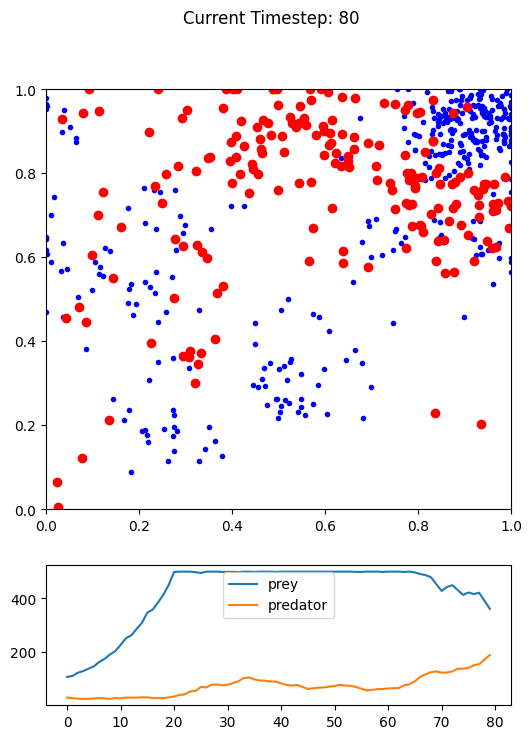

The final rabbit population was 361
The final fox population was 188
The result of the simulation was stable


In [15]:
# Import the functions we need for animation
from IPython import display
import time

max_timesteps = 80

# Set the reproduction rates for rabbits and foxes
rabbit_reprod_rate = 0.1
fox_reprod_rate = .5

# Winner (keeps track of whether rabbits won, foxes won, or stable/nobody won)
winner = "stable" # We set it to "stable" by default, and we only change it if one of the species goes extinct

# Make the initial condition
initialize() # <-- which function makes the initial condition?
for current_timestep in range(max_timesteps):
  update(rabbit_reprod_rate, fox_reprod_rate) # <-- which function updates the model for one timestep?
  plt.close()
  observe() # <-- which function lets us observe the world and our data using a visualization?

  # This code runs the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  #time.sleep(0.5)

  # Stop simulating if either rabbits or foxes die out!
  # If all rabbits die, we can say that foxes "won" (though they did kill off their own food supply)
  if num_rabbits_data[current_timestep] == 0:
    winner = "foxes"
    #break
  # If all foxes die, we can say that rabbits "won"
  elif num_foxes_data[current_timestep] == 0:
    winner = "rabbits"
    break

plt.close()

final_rabbit_pop = num_rabbits_data[len(num_rabbits_data) - 1]
final_fox_pop = num_foxes_data[len(num_foxes_data) - 1]

print("The final rabbit population was", final_rabbit_pop)
print("The final fox population was", final_fox_pop)
print("The result of the simulation was", winner)

**3.G** (3 points) Run the model a few times and see what happens. Did you observe any extinctions or does the model seem pretty stable? Do populations oscillate or converge to a fixed state? Do you observe the same result every time or are the runs variable?

***Double click*** and write down your response here!

I did not observe any extinctions in 80 timestamps and the result of the simulation was stable in each run. By running thie model a few times, I observe that in most runs the populations are oscillating instead of converging to a fixed state. In some circumstances, if both predator and prey reproduction rates are balanced, neither can overtake the other too quickly, so the populations do not seem to oscillate in only 80 runs.

When the population of rabbits increases, there are more food for their predador foxes, leading to the growth of foxes population. As the number of foxes increases, they eat more and more rabbits so the population of rabbits starts to decrease. Due to the decreasing rabbit population, foxes have less food and their numbers also decrease. This forms a predador-prey cycle which shows the oscillation between the populations of predador and prey.

I do not observe the same result every time and the populations oscillate in each run. The results are variable between different runs because agent movements are random.

**3.H** (6 points) Now, change the rabbit and fox reproduction rates (```rabbit_reprod_rate``` and ```fox_reprod_rate```) a few times and see what happens. These two rates are parameters in our model. Can you find a parameter combination where rabbits usually go extinct? Can you find one where foxes usually go extinct?

>*FOR GRADING PURPOSES, RETURN THE PARAMETERS TO DEFAULT AFTER ANSWERING THIS QUESTION*

For reference, the defaults are

*   rabbits have a 10% chance of reproducing
*   foxes have a 50% chance of reproducing

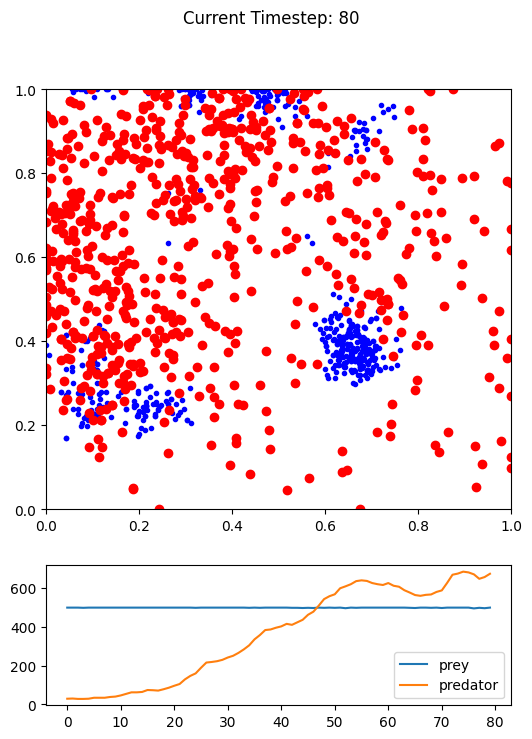

The final rabbit population was 500
The final fox population was 675
The result of the simulation was stable


In [40]:
# Import the functions we need for animation
from IPython import display
import time

max_timesteps = 80

# Set the reproduction rates for rabbits and foxes
rabbit_reprod_rate = 0.9
fox_reprod_rate = 0.5

# Winner (keeps track of whether rabbits won, foxes won, or stable/nobody won)
winner = "stable" # We set it to "stable" by default, and we only change it if one of the species goes extinct

# Make the initial condition
initialize() # <-- which function makes the initial condition?
for current_timestep in range(max_timesteps):
  update(rabbit_reprod_rate, fox_reprod_rate) # <-- which function updates the model for one timestep?
  plt.close()
  observe() # <-- which function lets us observe the world and our data using a visualization?

  # This code runs the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  #time.sleep(0.5)

  # Stop simulating if either rabbits or foxes die out!
  # If all rabbits die, we can say that foxes "won" (though they did kill off their own food supply)
  if num_rabbits_data[current_timestep] == 0:
    winner = "foxes"
    #break
  # If all foxes die, we can say that rabbits "won"
  elif num_foxes_data[current_timestep] == 0:
    winner = "rabbits"
    break

plt.close()

final_rabbit_pop = num_rabbits_data[len(num_rabbits_data) - 1]
final_fox_pop = num_foxes_data[len(num_foxes_data) - 1]

print("The final rabbit population was", final_rabbit_pop)
print("The final fox population was", final_fox_pop)
print("The result of the simulation was", winner)

We can first increase the rabbit reproduction rate from 0.1 to 0.9 and keep the fox reproduction rate the same as default model(0.5). We notice that the result of the simulation was stable. The population of rabbit tends to remain at a stable point (approximately 500), whereas the population of fox tend to oscillate and increase, finally surpassing the number of rabbit.

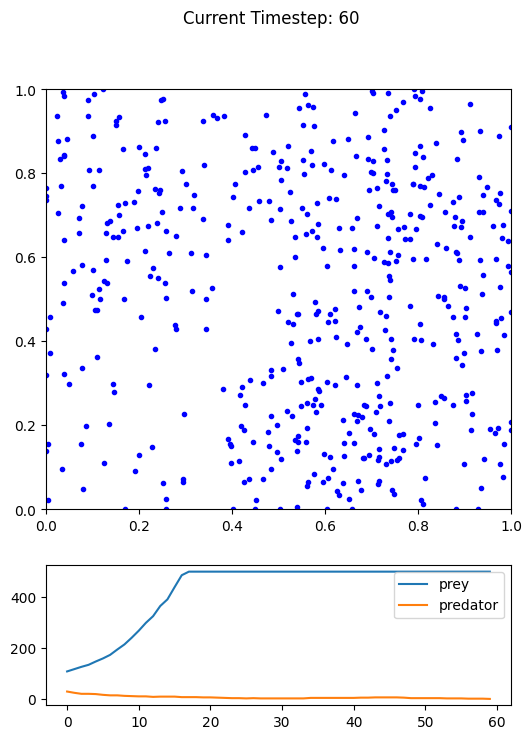

The final rabbit population was 500
The final fox population was 0
The result of the simulation was rabbits


In [37]:
# Import the functions we need for animation
from IPython import display
import time

max_timesteps = 80

# Set the reproduction rates for rabbits and foxes
rabbit_reprod_rate = 0.1
fox_reprod_rate = 0.2

# Winner (keeps track of whether rabbits won, foxes won, or stable/nobody won)
winner = "stable" # We set it to "stable" by default, and we only change it if one of the species goes extinct

# Make the initial condition
initialize() # <-- which function makes the initial condition?
for current_timestep in range(max_timesteps):
  update(rabbit_reprod_rate, fox_reprod_rate) # <-- which function updates the model for one timestep?
  plt.close()
  observe() # <-- which function lets us observe the world and our data using a visualization?

  # This code runs the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  #time.sleep(0.5)

  # Stop simulating if either rabbits or foxes die out!
  # If all rabbits die, we can say that foxes "won" (though they did kill off their own food supply)
  if num_rabbits_data[current_timestep] == 0:
    winner = "foxes"
    #break
  # If all foxes die, we can say that rabbits "won"
  elif num_foxes_data[current_timestep] == 0:
    winner = "rabbits"
    break

plt.close()

final_rabbit_pop = num_rabbits_data[len(num_rabbits_data) - 1]
final_fox_pop = num_foxes_data[len(num_foxes_data) - 1]

print("The final rabbit population was", final_rabbit_pop)
print("The final fox population was", final_fox_pop)
print("The result of the simulation was", winner)

***Double click*** and write down your response here!

If we decrease the fox reproduction rate from 0.5 to 0.2 while keeping the rabbit reproduction rate the same as the default model (0.1), we observe that the result of the simulation was rabbits and foxes are more likely to go extinct.

Since the agents movement are random, we cannot guarantee the extinctions of foxes every time we run this model. But the reduced reproduction rate of fox suggests that they are less likely to keep up with numerous rabbit.

**Return the model to default**

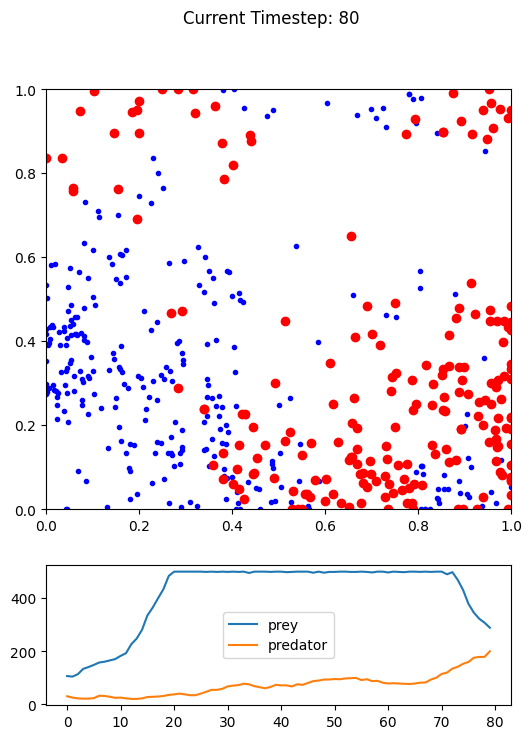

The final rabbit population was 289
The final fox population was 200
The result of the simulation was stable


In [41]:
# Import the functions we need for animation
from IPython import display
import time

max_timesteps = 80

# Set the reproduction rates for rabbits and foxes
rabbit_reprod_rate = 0.1
fox_reprod_rate = 0.5

# Winner (keeps track of whether rabbits won, foxes won, or stable/nobody won)
winner = "stable" # We set it to "stable" by default, and we only change it if one of the species goes extinct

# Make the initial condition
initialize() # <-- which function makes the initial condition?
for current_timestep in range(max_timesteps):
  update(rabbit_reprod_rate, fox_reprod_rate) # <-- which function updates the model for one timestep?
  plt.close()
  observe() # <-- which function lets us observe the world and our data using a visualization?

  # This code runs the animation
  display.clear_output(wait=True)
  display.display(plt.gcf())
  #time.sleep(0.5)

  # Stop simulating if either rabbits or foxes die out!
  # If all rabbits die, we can say that foxes "won" (though they did kill off their own food supply)
  if num_rabbits_data[current_timestep] == 0:
    winner = "foxes"
    #break
  # If all foxes die, we can say that rabbits "won"
  elif num_foxes_data[current_timestep] == 0:
    winner = "rabbits"
    break

plt.close()

final_rabbit_pop = num_rabbits_data[len(num_rabbits_data) - 1]
final_fox_pop = num_foxes_data[len(num_foxes_data) - 1]

print("The final rabbit population was", final_rabbit_pop)
print("The final fox population was", final_fox_pop)
print("The result of the simulation was", winner)

**3.I** (Extra credit: 6 points) In plain English, name four changes that you would make to how this model works.

>To clarify, changing parameters like reproduction and death rates don't affect how the underlying model works. I'm looking for deeper-level logic and rules changes.

***Double click*** and write down your response here!

1. We could establish a seasonal cycle which might change the mobility and the agent movements in this model because seasonal and weather factors may have a large impact on predator-prey cycle in reality. For example, there is less food available during winder, causing rabbits reproduction rates to decrease. Also, foxes are more likely to catch rabbits due to the snow and the population of foxes might increase rapidly during winter.

2. We can introduce different types of agent movements instead of making it fully random. In real world, foxes and rabbits may exhibit some types of intentional actions. For example, rabbits might avoiced an area if they notice that area is surrounded by higher concentration of foxes.

3. Furthermore, when considering more realistic interactions between rabbits and foxes, we could introduce some other species in this model. The ecosystem is complex and some other food chain is also included. We can add some other predators of rabbits such as wolves and birds in this model. Some birds also eat foxes in real world.

4. Besides, age and life cycle plays a important role in this model. If we incorporate different ages of foxes and rabbits in this model, the infant rabbits may be more vulnerable when they are attacked by foxes and elderly foxes may have weakened ability to hunt. This changes the movement patterns and the vitality of each species in this model.

### Problem 4: Predator-Prey Experiment (11 points)
As you observed in the previous problem, it can be hard to get an idea how changing parameters affects how your model runs.

In parts G and H of Problem 3, you had to vary parameters yourself and run the model a bunch of times to get an idea of how these changes affected model behavior.

In this problem, we'll make an experiment that runs the model for us with a bunch of different parameter combinations. Then, we'll use a visualization to see what happened across "parameter space."

Parameter space is just a fancy phrase that means the set of all possible parameter settings. For rabbit and fox reproduction rates, parameter space lies between 0% and 100%.

**4.A** (1 point) To run the model a bunch of times, it would be good to have a special ```run()``` function that runs the model for us. Let's make that here. Look for ```<--```.

>Notice that we don't use ```observe()``` anymore because, in a large-scale experiment, we don't care about visualizing every run of the model. We just want to know the final outcome of running it with different sets of parameters.

>To this end, we ```return``` the "winner." The winner is decided by the following:
* If foxes go extinct, rabbits are the winner.
* If rabbits go extinct, foxes are the winner (although they will eventually die out with no food)
* If neither go extinct, "stable" is the winner. This indicates that neither species went extinct within ```max_timesteps```.

In [42]:
max_timesteps = 80

def run(rabbit_reprod_rate, fox_reprod_rate):

  # Winner (keeps track of whether rabbits won (3), foxes won (1), or stable/nobody won (2))
  winner = 2 # 2 for stable

  # Make the initial condition
  initialize() # <-- which function makes the initial condition?
  for i in range(max_timesteps):
    update(rabbit_reprod_rate, fox_reprod_rate)# <-- which function updates the model for one timestep?

    # Stop simulating if either rabbits or foxes die out!
    # If all rabbits die, we can say that foxes "won" (though they did kill off their food supply)
    if num_rabbits_data[i] == 0:
      winner = 1 # 1 for foxes win
      break
    # If all foxes die, we can say that rabbits "won"
    elif num_foxes_data[i] == 0:
      winner = 3 # 3 for rabbits win
      break

  return winner # <-- Return the winner!

In this experiment, we're going run the model for every combination of the following:

```rabbit_reprod_rate``` = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8

```fox_reprod_rate``` = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8

That's 8 × 8 = 64 distinct runs of the model!

___

Because of this, your computer is going to take a really long time to run this experiment (sorry).

>One reason that many modelers use mathmatics instead of agent-based modeling is the sheer amount of time that it takes for agent-based models to run. You'll witness that firsthand here.

I've basically stolen the following codeblocks from Professor S-M's Lecture 9b code (shhhh don't tell him), and changed them around a bit so that they run the experiment we want to conduct.

This first codeblock contains a function that creates a nice plot for us. Don't worry too much about how it works, this problem is more conceptual.

In [43]:
import numpy as np

def myPlot(winner):
  fig, ax = plt.subplots()
  plt.imshow(winner, vmin = 1, vmax = 3)
  cbar = plt.colorbar(ticks=[1,2,3])
  ticks = cbar.ax.set_yticklabels(['Foxes', 'Stable', 'Rabbits'])
  a = ax.set_xticks(range(8))
  a = ax.set_xticklabels(np.arange(1,9)/10)
  a = ax.set_yticks(range(8))
  a = ax.set_yticklabels(np.arange(8,0,-1)/10)
  a = plt.xlabel('Fox Reproduction Rate')
  a = plt.ylabel('Rabbit Reproduction Rate')
  plt.show()
  display.clear_output(wait=True)

The second codeblock runs our model 64 times for each parameter combination! It has been completed for you (you're welcome).

**4.B** (1 point) Run the codeblock below to conduct the experiment. It will take a while. Then post a screenshot of the result in the text block below (embedded or cloud link).

While it's running, take a break! Get a drink, watch some TV, doomscroll on Twitter, or even send me a strongly-worded email. Whatever floats your boat!

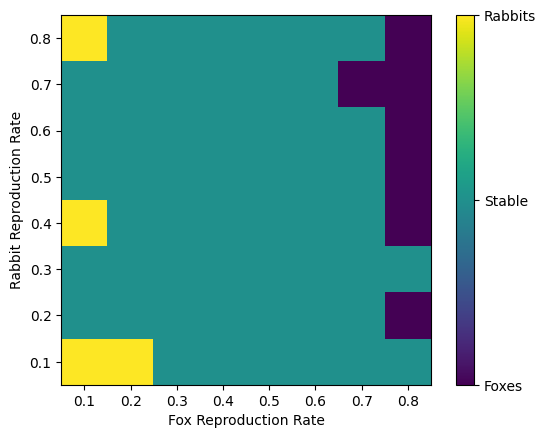

In [44]:
winner = np.full((8,8),np.nan)
gridVals = np.arange(0.1,0.9,0.1)

r_index = len(gridVals)-1  # low rabbit_reprod_rate should start at the *bottom*
f_index = 0                # low fox_reprod_rate should start at the left

for rabbit_reprod_rate in gridVals:
  for fox_reprod_rate in gridVals:
    winner[r_index, f_index] = run(rabbit_reprod_rate, fox_reprod_rate)
    myPlot(winner)

    f_index +=1

  r_index -=1  # as rabbit reproduction rate increases, that goes upwards, which is a lower index in the matrix
  f_index = 0  #reset to the left side

myPlot(winner)

***Double click*** and post the link to your screenshot here
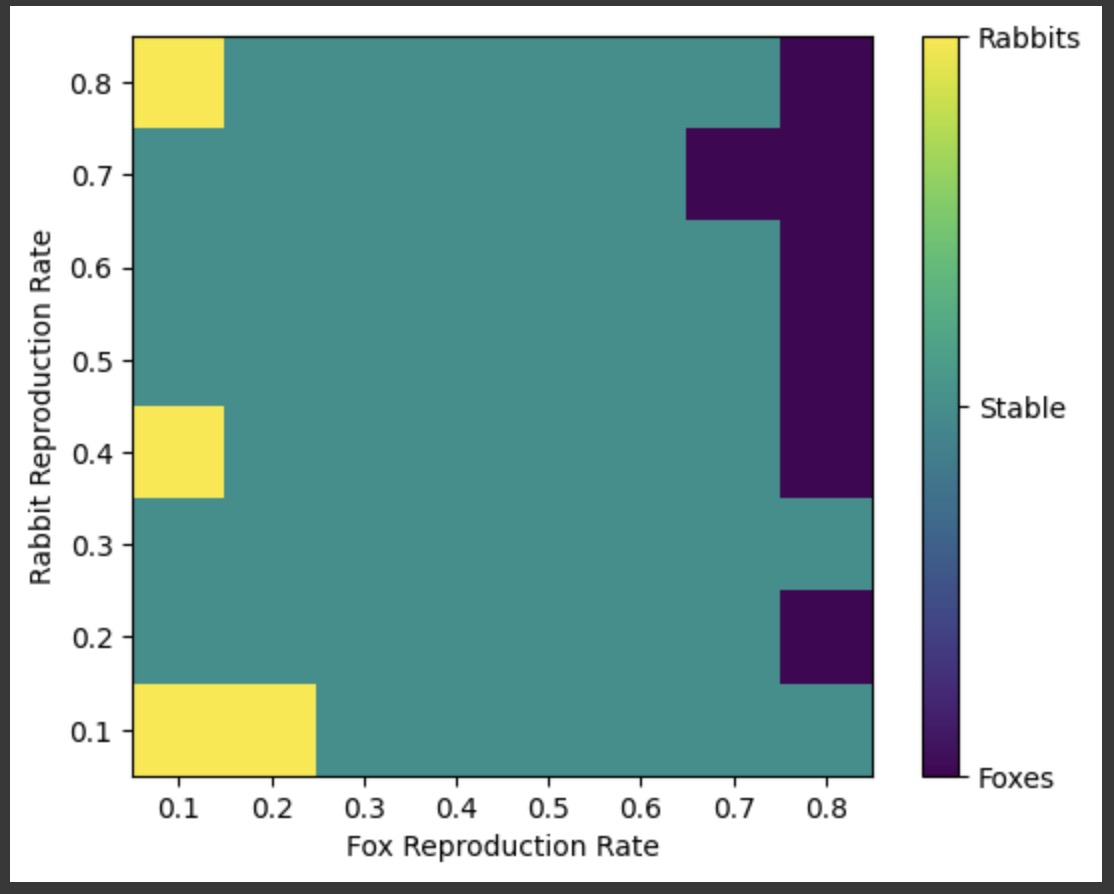


**4.C** (3 points) Interpret your results. What was the most common outcome? Under what conditions did you observe a less common outcome?

***Double click*** and write down your response here!

From the plot above, the "stable" is the most common outcome, meaning that in the majority of situations, the two species can coeist and survive without driving the other to extinction. We observe a less common outcome with foxes dominating the cell when the fox reproduction rate is greater than 0.7. Similarly, we observe a less common outcome with rabbits dominating when the fox reproduction rate is less than 0.2 and rabbit reproduction rate is 0.1, 0.4, and 0.8. When neither species has a significant reproductive advantage, a balanced and stable outcome will occur.

In this experiment, we ran a sweep of two of our model parameters: fox reproduction rate and rabbit reproduction rate. For each pair of parameters, we ran the model once for a total of 64 runs.

Note that there are many other parameters in the model that we didn't sweep. These include death rates, carrying capacity, magnitude of movement, and neighborhood radius.

What's more, we only ran the model once for each set of parameters. In science, it's important to repeat experiments multiple times to be sure that our results hold.

**4.D** (6 points) With all of this in mind, name two ways that our experiment could be improved.

>Keep in mind that the focus of this question is the parameter-sweep experiment that you performed; it does NOT ask for alterations to the predator-prey model itself.

***Double click*** and write down your response here!

Firstly, we notice that randomness can lead to variability in our results for the same set of parameters but we only ran the model once for each set of parameters. We can improve this by running multiple trials (e.g 20 times) for each parameter and computing the average result for each set. We might even calculate the standard deviation for each set conduct statistical analysis to better determine the distributions of different outcomes. Then we can introduce advanced visualizations to show the patterns across the parameter space.

Moreover, the current interval (0.1) in each step might be too large. We can implement a denser parameter grid to lower each increments to 0.05 or even smaller to observe the behavior thoroughly in this model.

Besides, there are many other parameters in the model that we didn't sweep such as death rates, carrying capacity, magnitude of movement, and neighborhood radius. We can incorporate some additional parameters in our model by comparing two parameters at a time. This allows us to capture the interactions between some specific parameters while keeping other variables unchanged and keeping the number of runs.


## Conceptual Question
### Problem 5: Leaving the Grid Behind (15 points)
In coding up the Predator-Prey model, you've created your first non grid-based model with free-moving agents.

Now, I want you to come up with a different process that could be modeled using free-moving agents. Then, do the following:
*   Describe this process
*   Discuss why you think this process can be better represented with free-moving agents than with agents in a grid

***Double click*** and write down your response here!

One process that could be modeled using free-moving agents is the patterns of animal migration. We can incorporate several agents such as zebra, elephant, gazelle, and elk to this model. Similar to the predator-prey model, the x, y coordinates represent the location and moving patterns of each animal.

The animals tend to stick close to their herd to avoid the attack from their predators and neighbors. They need to protect themselves while moving with some random variation in a broad direction. After they reach their breeding grounds, they will stop moving and the coordinates will turn back to empty.

The movements of migration is not fully random and is determined by some factors including their energy level, aging dynamics, changing in temperature, weather, food and water resources, etc.

The energy level of each animal may deplete over time. The extreme weather such as snow or frost might have a big impact on animals' routes and movements during migration. Additionally, they are more inclined to migrate in an area where there are plenty of food and water supplies and where there is less chance of exposing them to their predators.


This process can be better represented with free-moving agents than with agents in grid because animal movements are usually continuous. Animals have chance to stick to each other and move as a group more realistically with free-moving agents. Also similar to the predator-prey model, each agent might interact with their predators and other migrating herbs. Free-moving agents provide more diverse interactions between each animal than that in grid. Since some of their movement patterns are influenced by environmental factors, changing in weather, temperature, or even topography could drastically modify the moving direction. These sudden and unpredictably changing movements can be accommodated by a model with free-moving agents.

